In [127]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline
import numpy as np

In [129]:


# Folder where all your CSV files are located
folder_path = 'C:/Users/anshm/OneDrive/Pictures/SRM MINI PROJECT/archive (15)'

# Get a list of all the CSV files in the directory
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through the list of CSV files and append each one to the list of DataFrames
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
final_df.head()  # Show the first few rows of the combined DataFrame


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [131]:
#Summary Statistics.

final_df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,37082.000000,37082.000000,37082.000000,37082.000000,37082.000000,3.708200e+04,3.708200e+04
mean,1056.699018,1016.058015,952.987707,985.323755,987.120511,3.022542e+09,1.542943e+10
std,755.992373,5249.503670,4907.932082,5088.101367,5093.703878,1.190963e+10,7.059128e+10
min,1.000000,0.000089,0.000079,0.000086,0.000086,0.000000e+00,0.000000e+00
25%,420.000000,0.075664,0.069536,0.072456,0.072648,4.937190e+06,2.395955e+08
50%,910.000000,1.008733,0.999850,1.001157,1.001138,8.512805e+07,1.405335e+09
75%,1585.000000,31.916399,28.996246,30.459673,30.512205,9.388489e+08,5.159305e+09
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [133]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        37082 non-null  int64  
 1   Name       37082 non-null  object 
 2   Symbol     37082 non-null  object 
 3   Date       37082 non-null  object 
 4   High       37082 non-null  float64
 5   Low        37082 non-null  float64
 6   Open       37082 non-null  float64
 7   Close      37082 non-null  float64
 8   Volume     37082 non-null  float64
 9   Marketcap  37082 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.8+ MB


In [135]:
#identifying the missing values
final_df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

                                              #insight:->
                                            1. There are no Null values there!


                                         EDA 
                                         1.UNIVARIATE ANALYSIS:->

In [137]:
#Distribution Plots:
# For Numeric Variables (High, Low, Open, Close, Volume, Marketcap): Use histograms

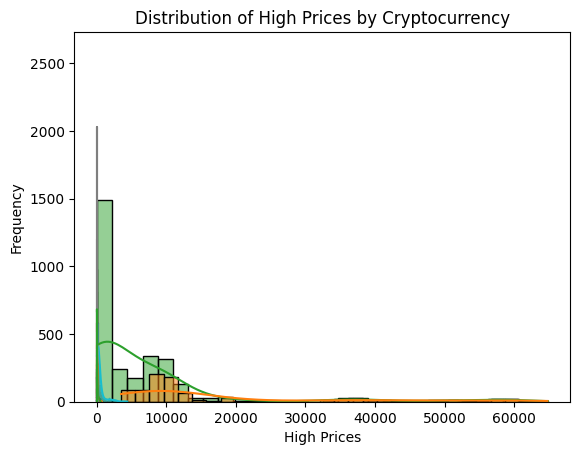

In [139]:
# Loop through each unique cryptocurrency name and plot the 'High' prices
for name in final_df['Name'].unique():
    # Filter the dataframe by cryptocurrency name
    subset = final_df[final_df['Name'] == name]
    
    # Plot the histogram with KDE
    sns.histplot(subset['High'], kde=True, label=name, kde_kws={'bw_adjust': 1.5}, bins=30)

# Add labels and title
plt.title('Distribution of High Prices by Cryptocurrency')
plt.xlabel('High Prices')
plt.ylabel('Frequency')
plt.show()


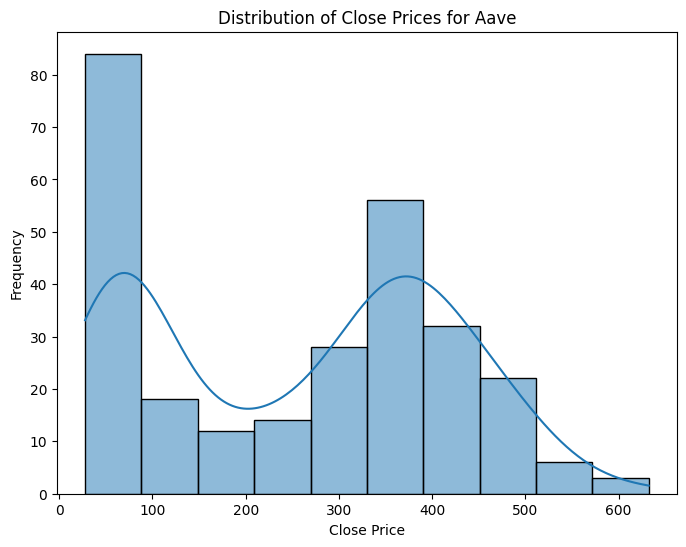

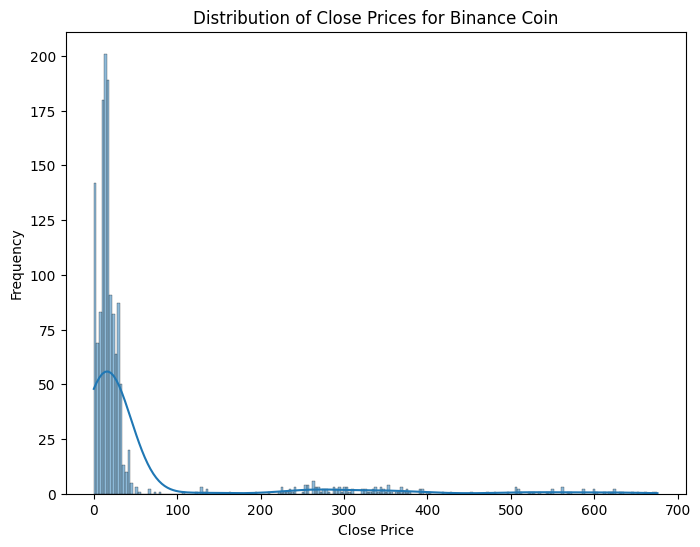

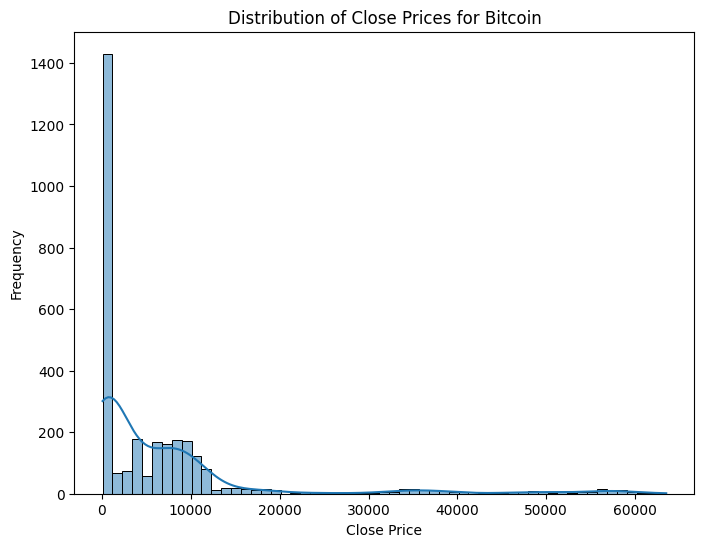

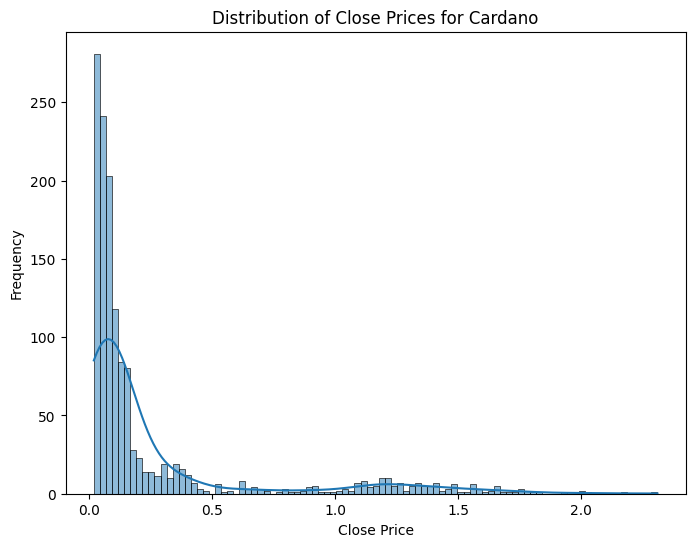

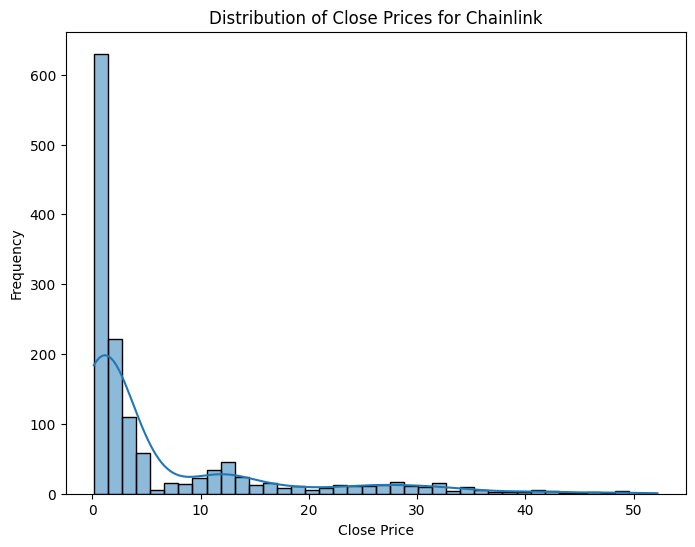

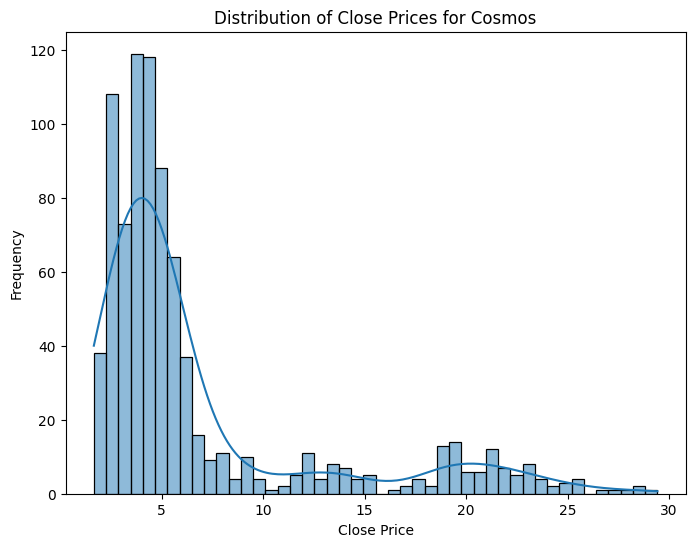

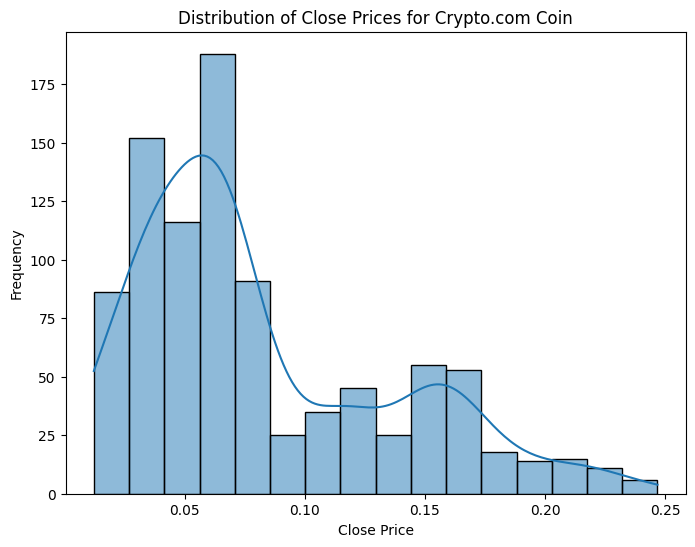

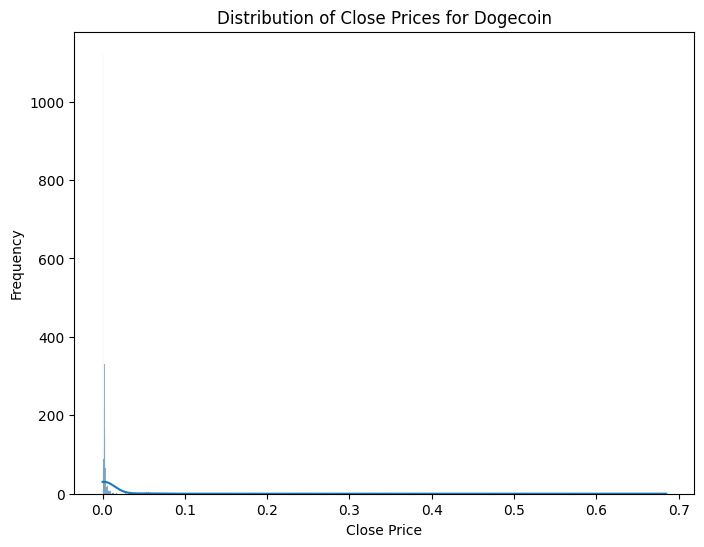

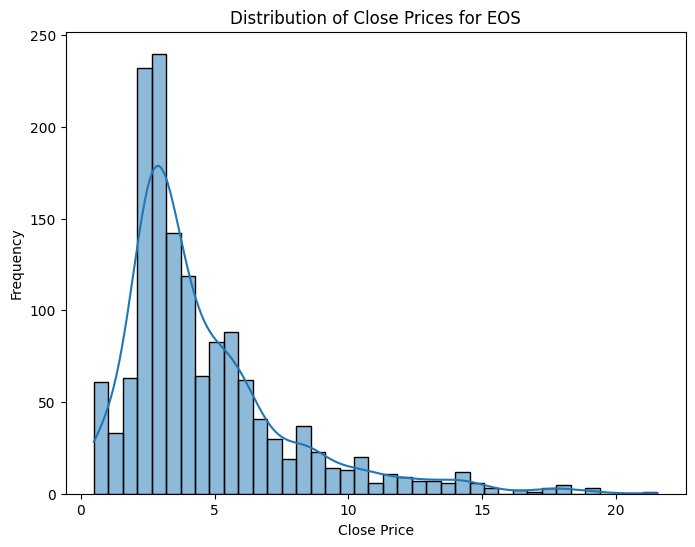

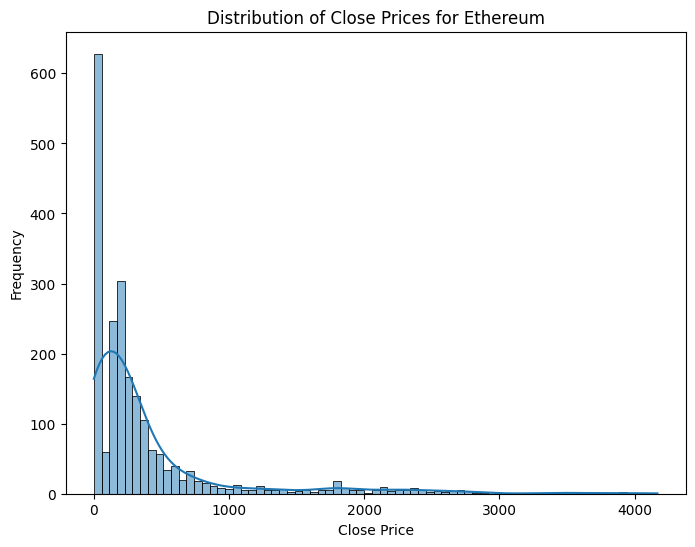

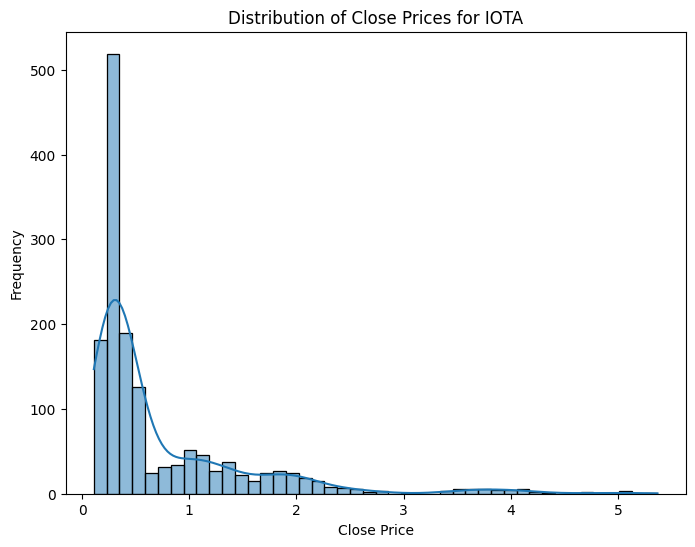

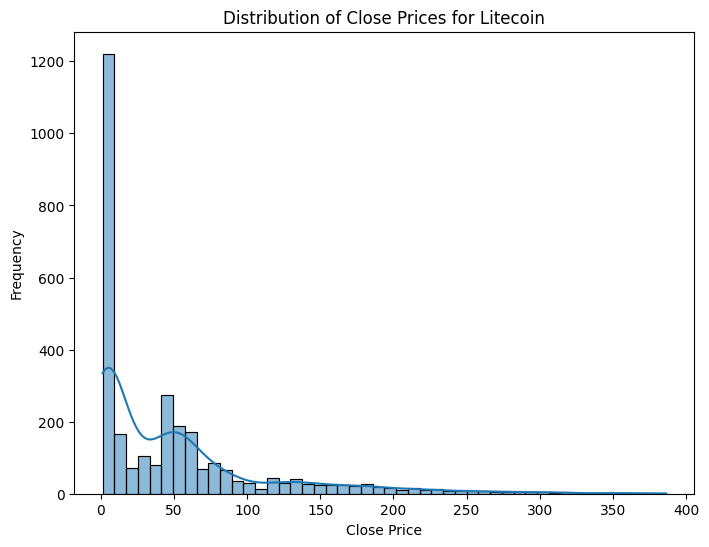

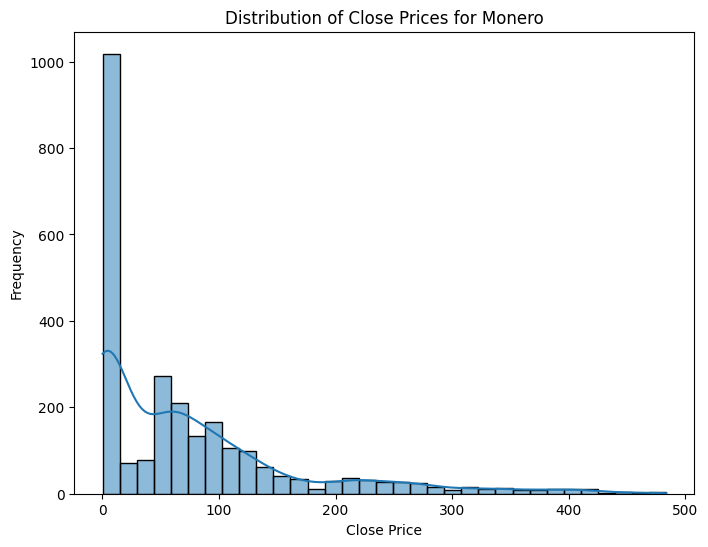

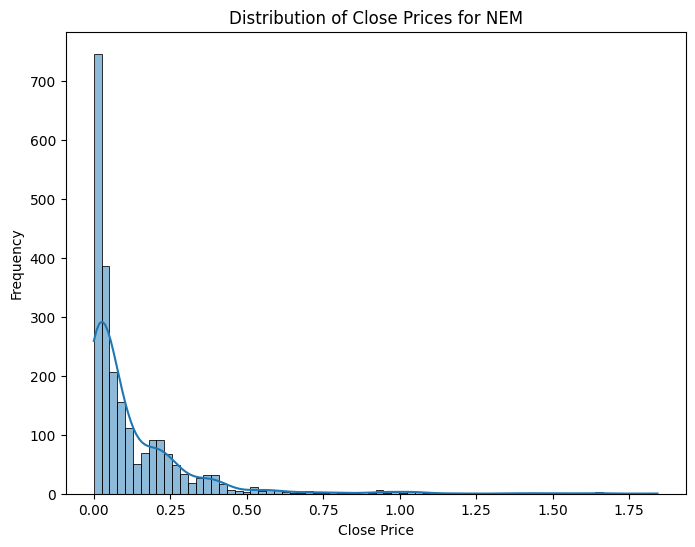

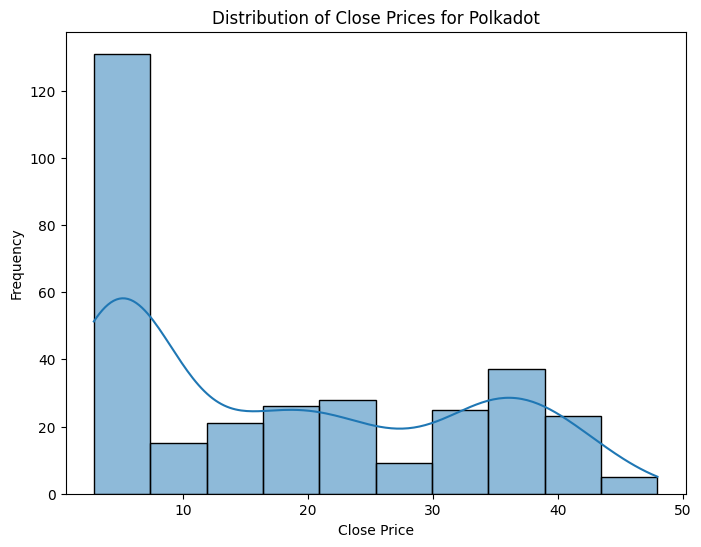

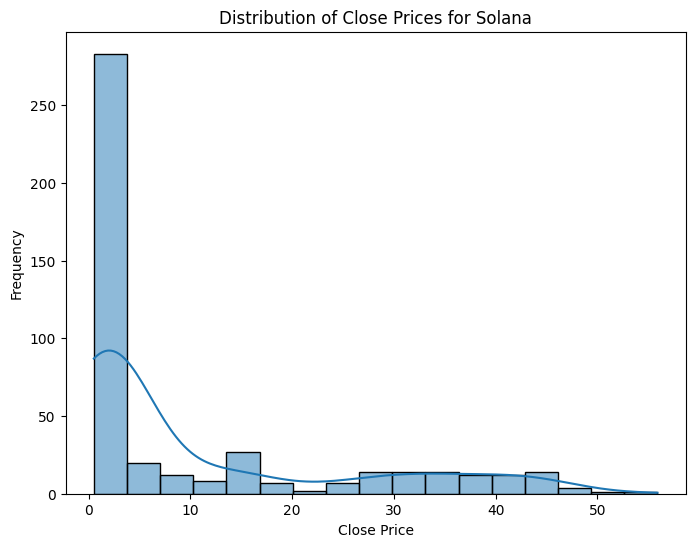

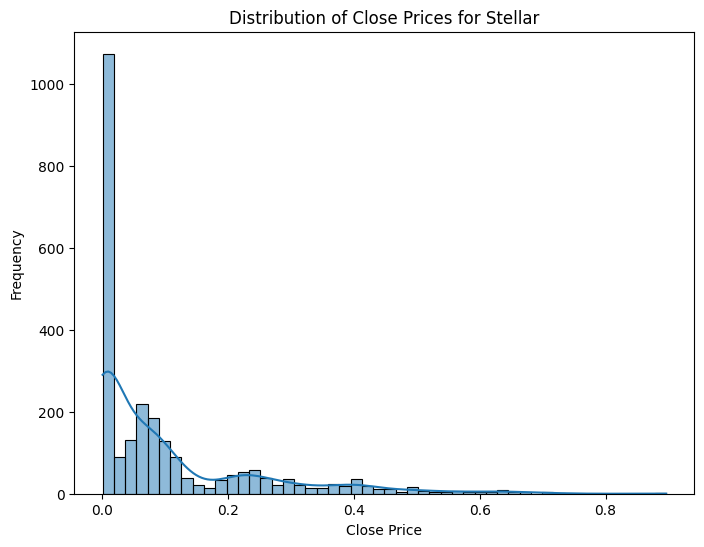

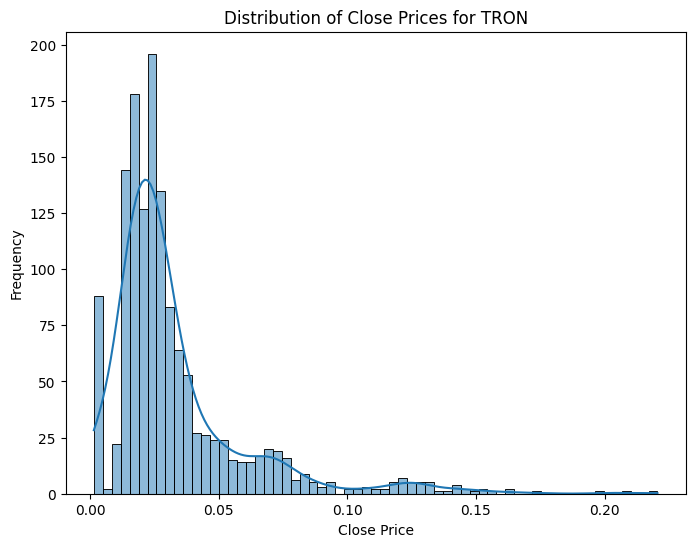

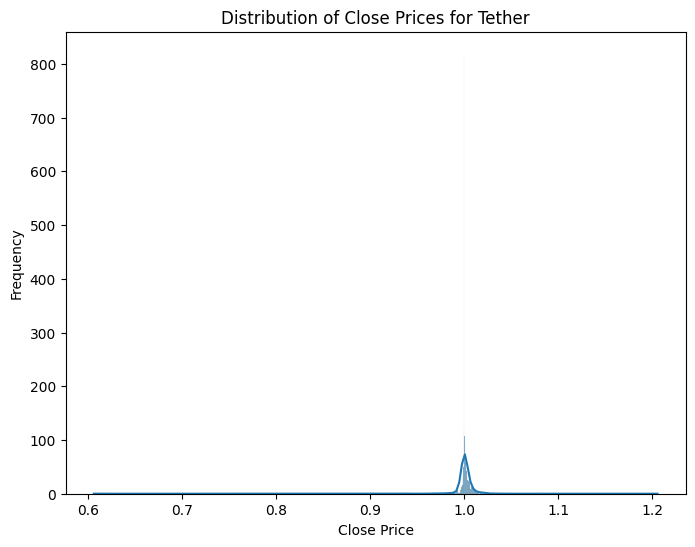

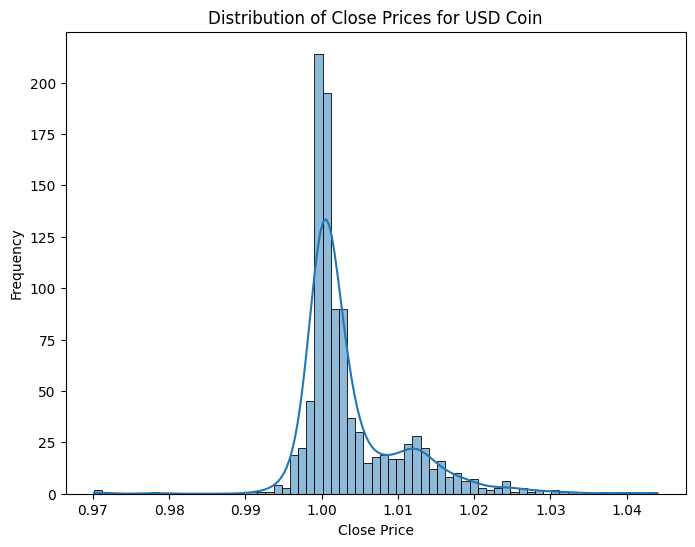

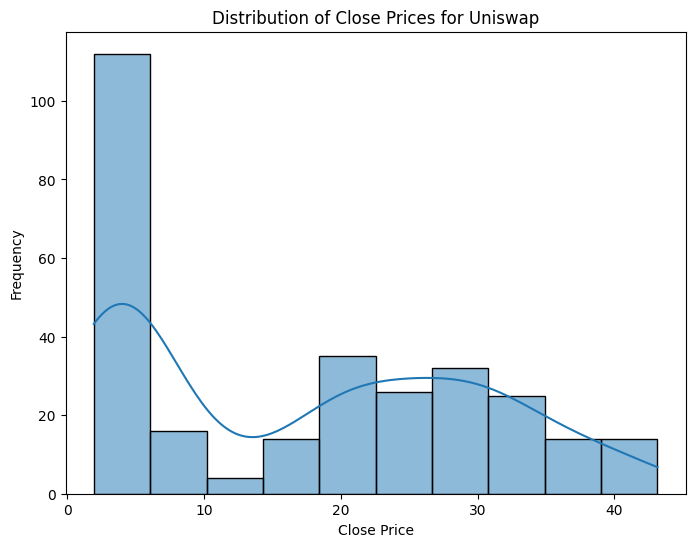

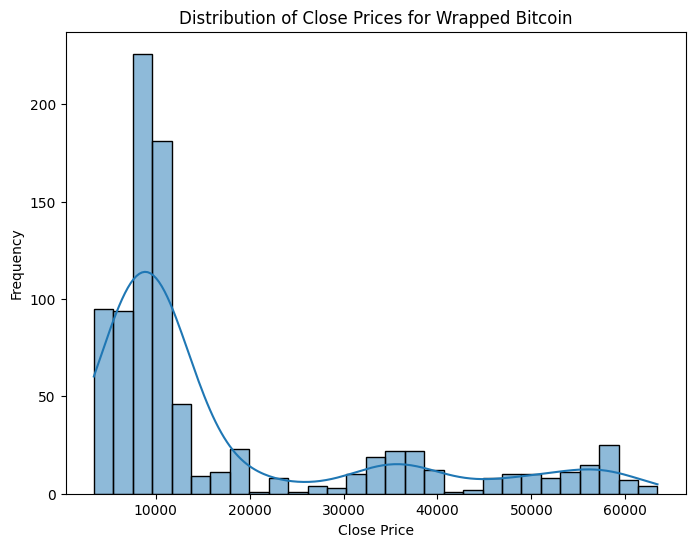

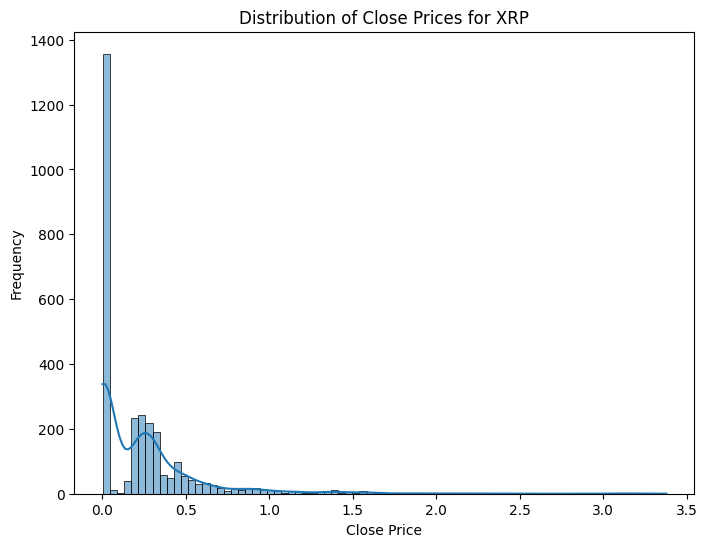

In [141]:
# Group the data by 'Name' and plot histogram for each group
for name, group in final_df.groupby('Name'):
    plt.figure(figsize=(8, 6))
    sns.histplot(group['Close'], kde=True)
    plt.title(f'Distribution of Close Prices for {name}')
    plt.xlabel('Close Price')
    plt.ylabel('Frequency')
    plt.show()


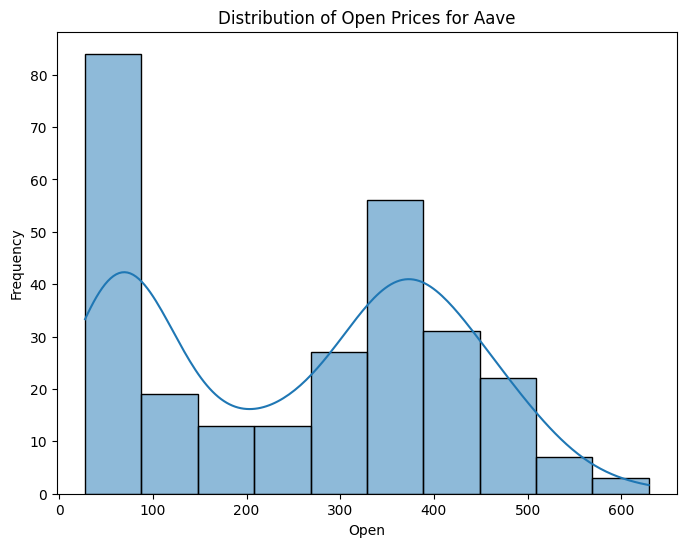

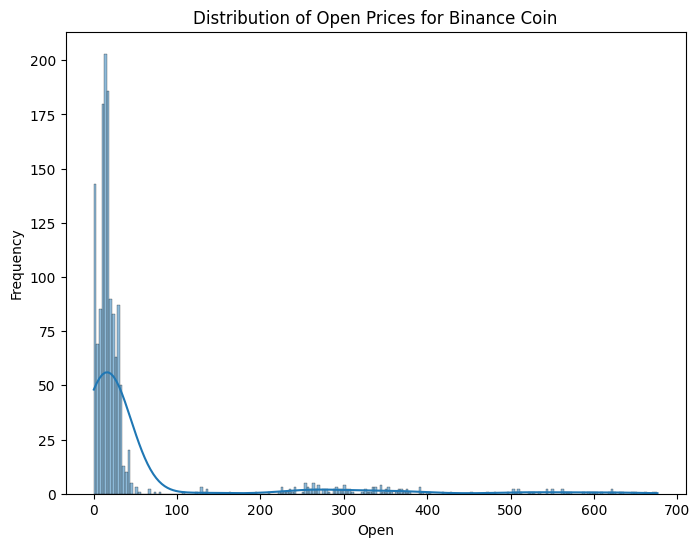

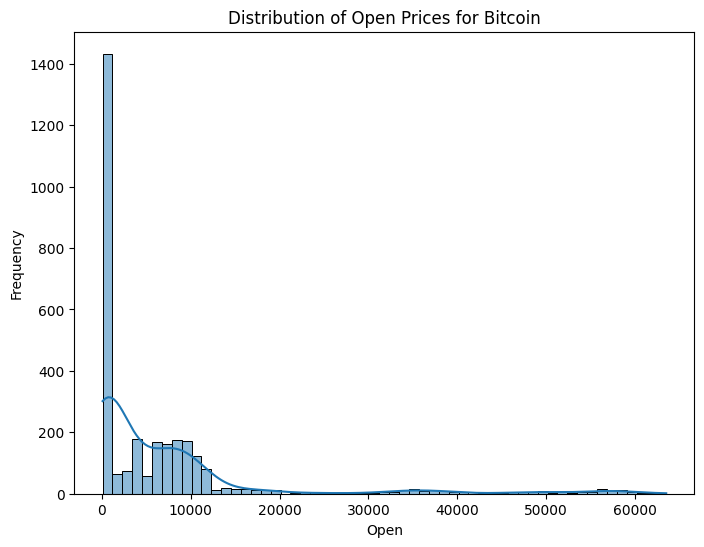

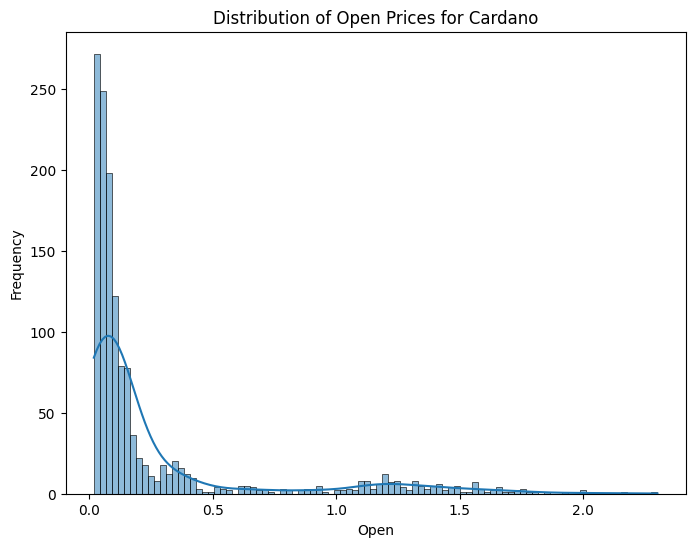

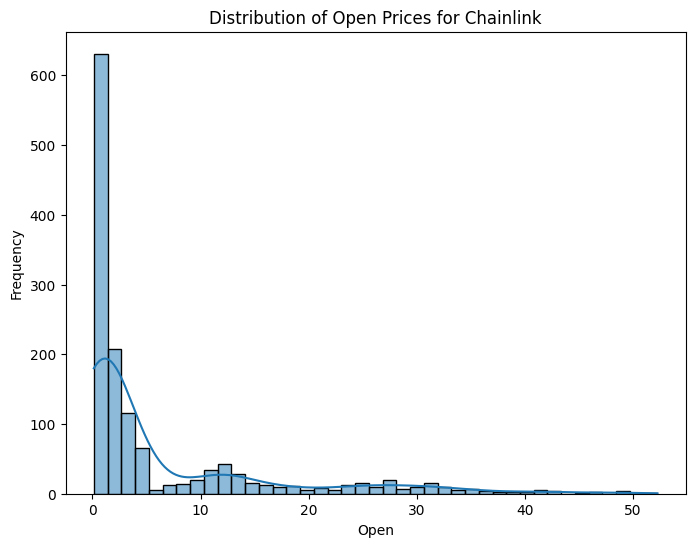

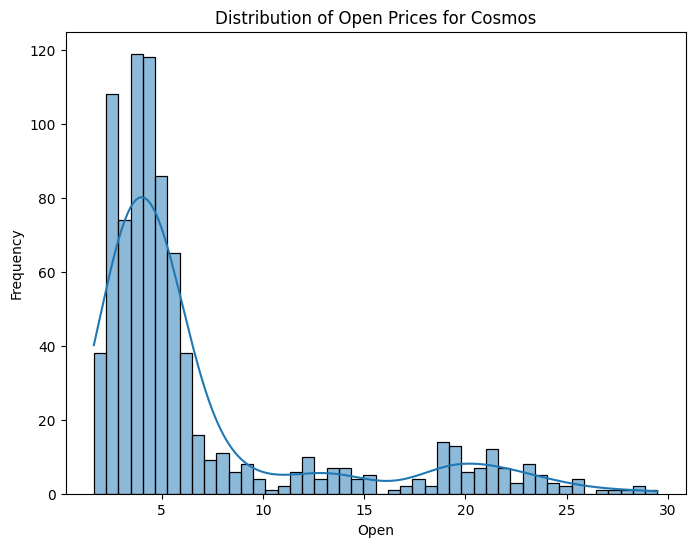

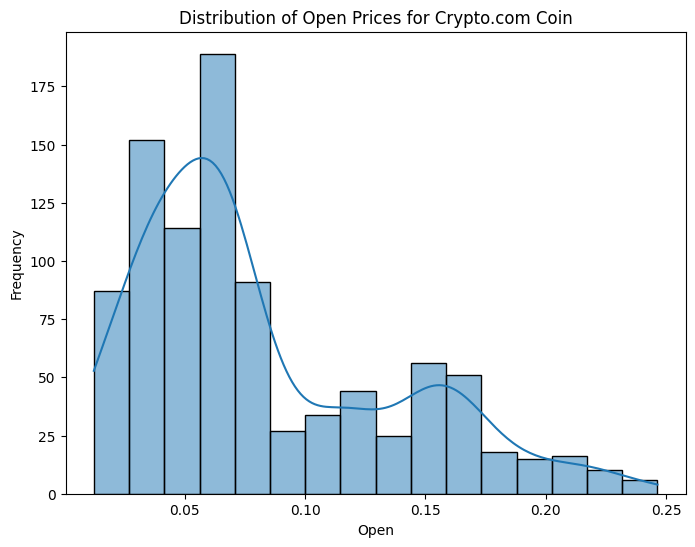

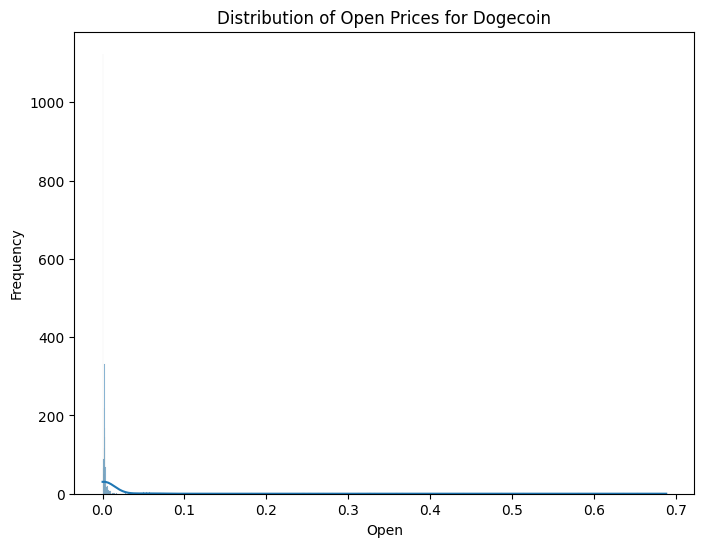

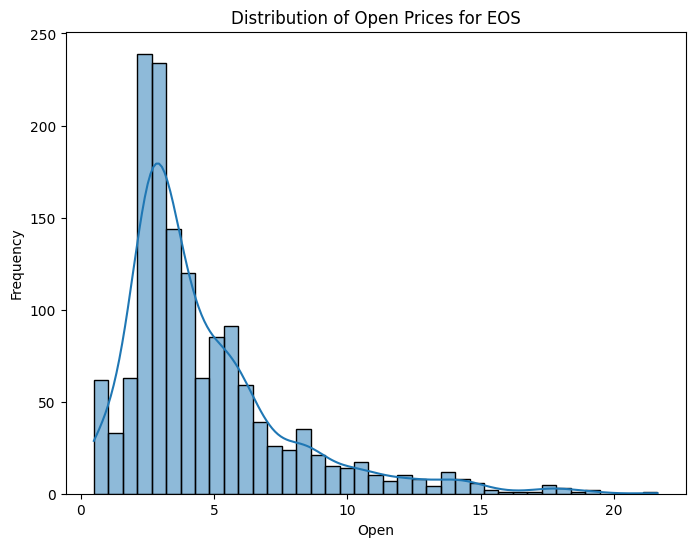

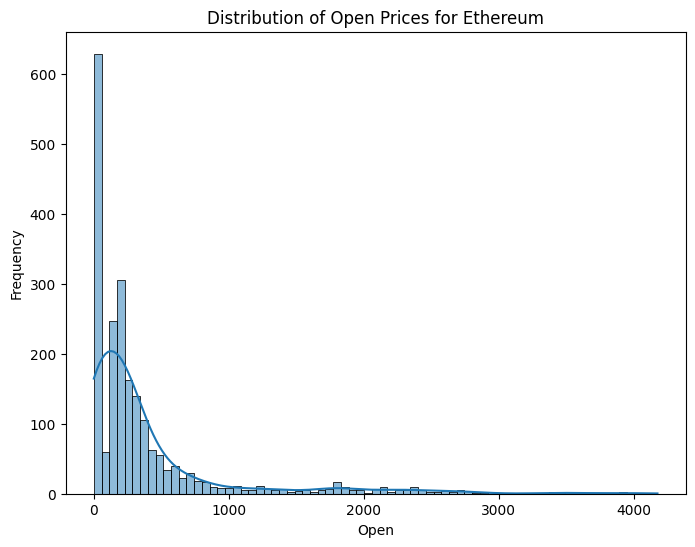

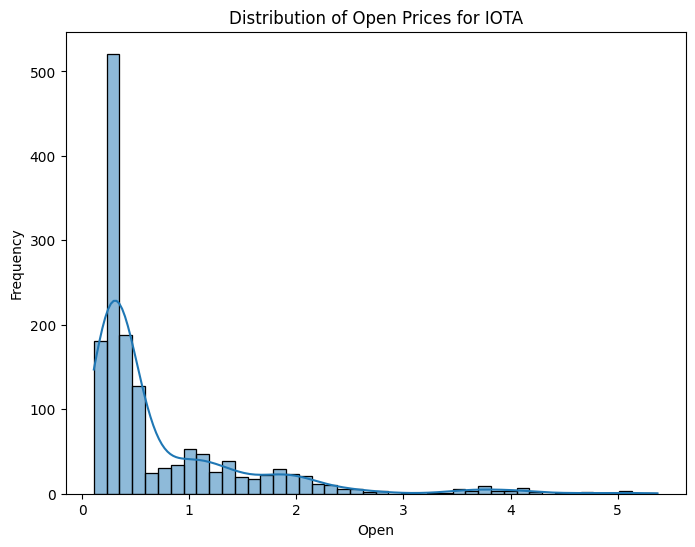

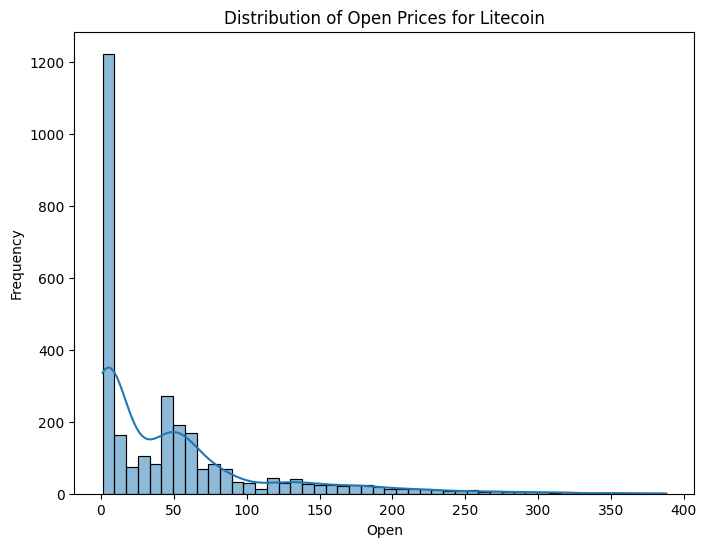

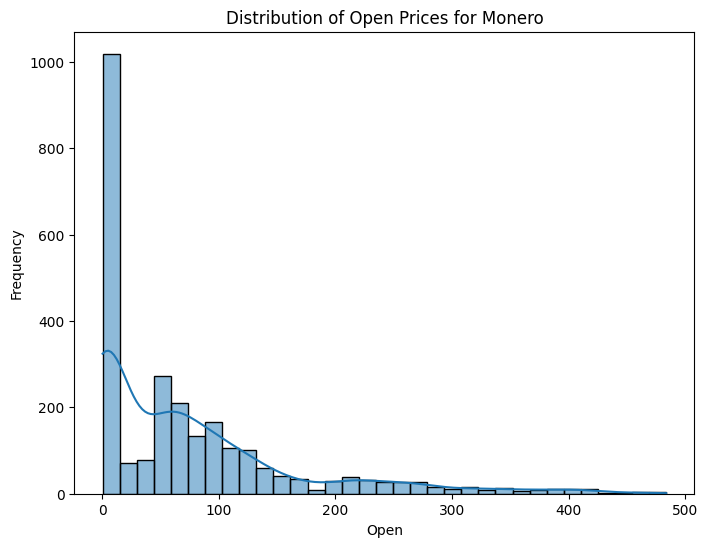

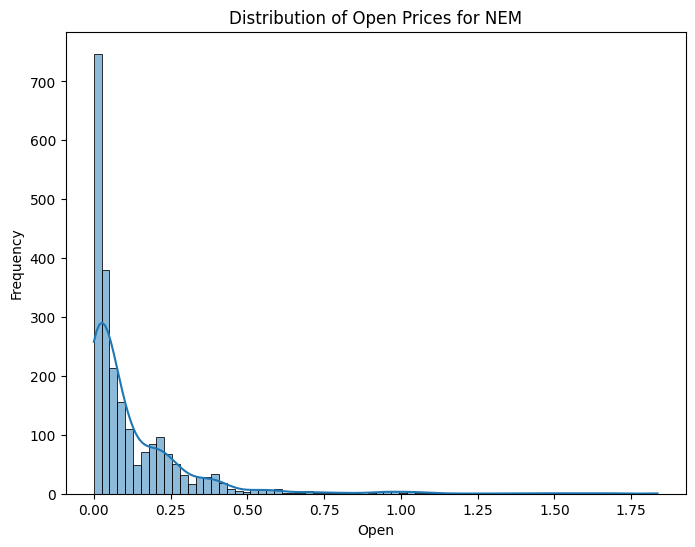

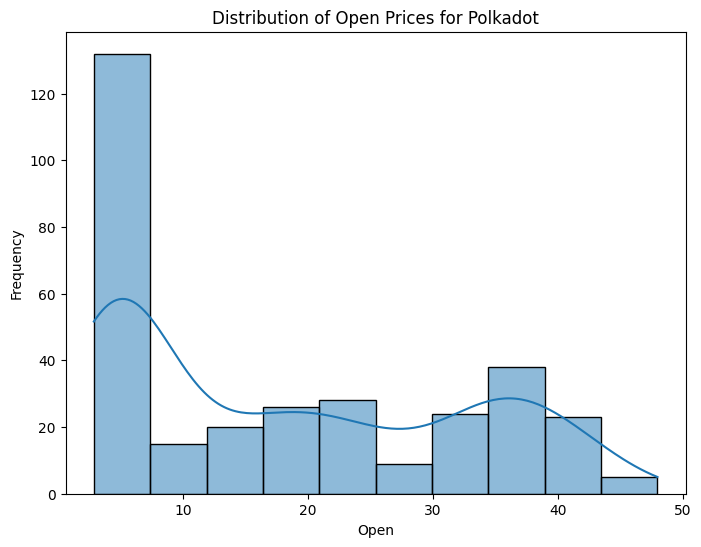

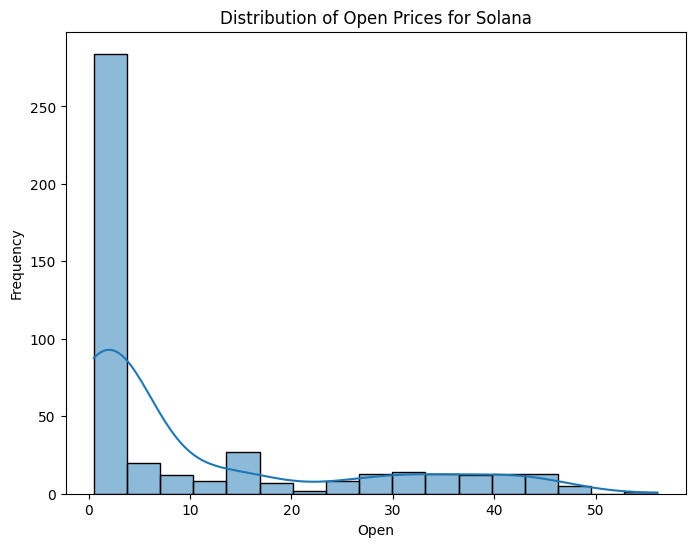

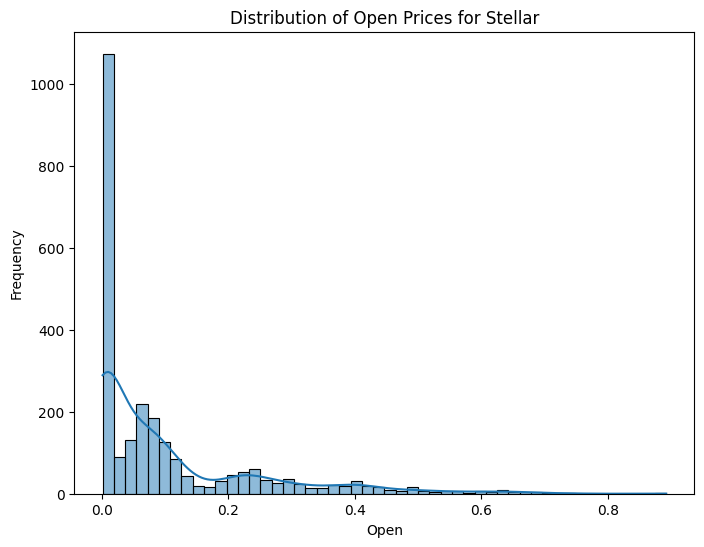

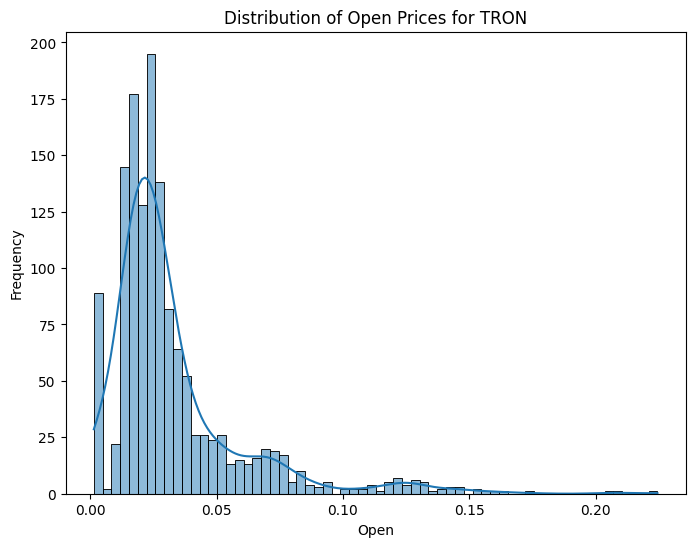

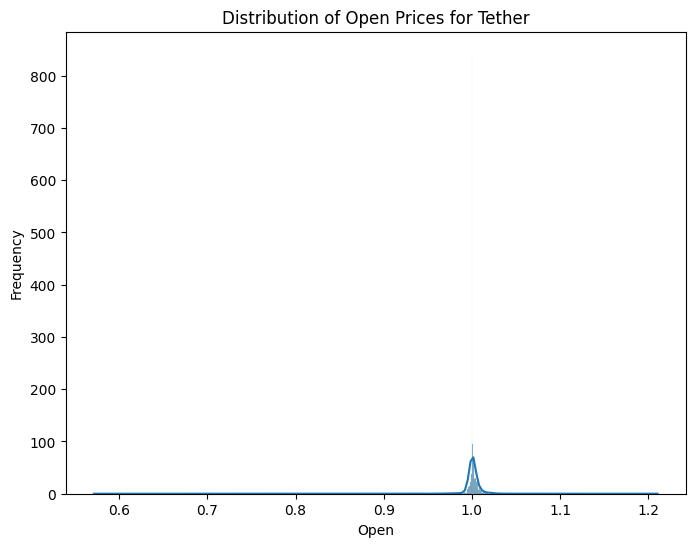

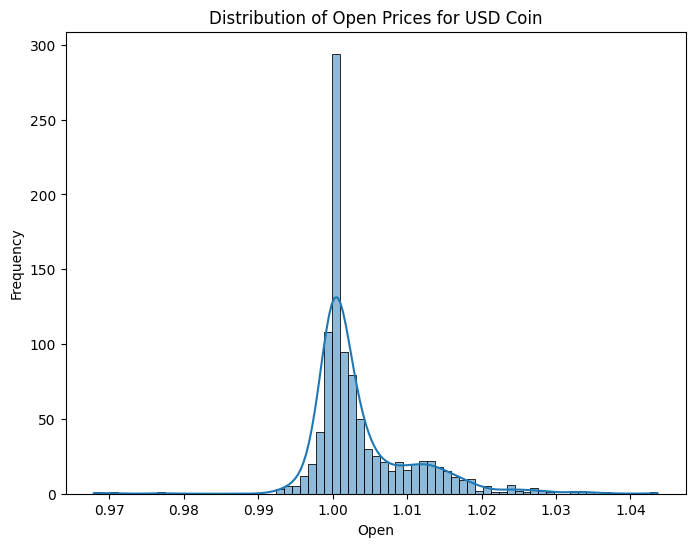

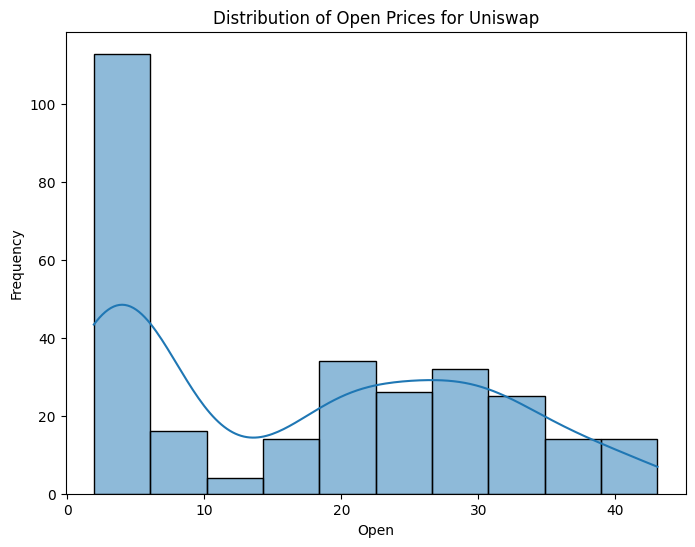

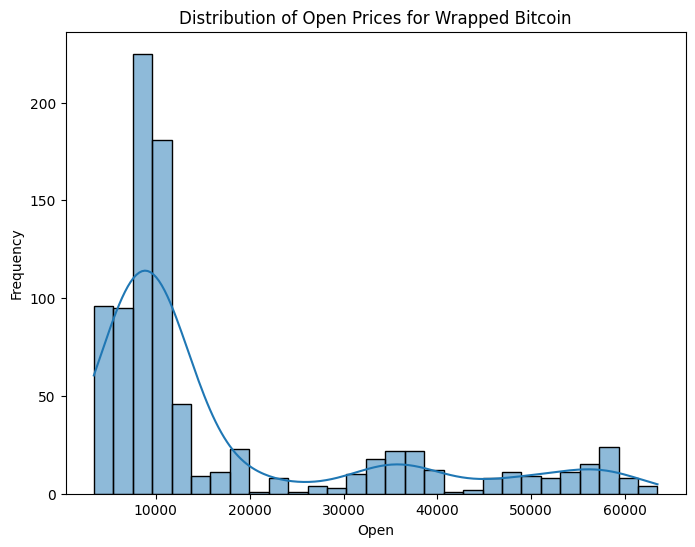

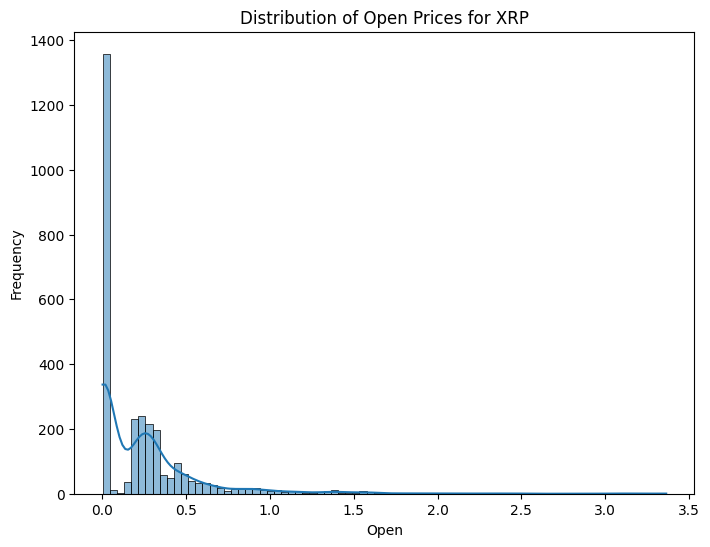

In [143]:
# Group the data by 'Name' and plot histogram for each group
for name, group in final_df.groupby('Name'):
    plt.figure(figsize=(8, 6))
    sns.histplot(group['Open'], kde=True)
    plt.title(f'Distribution of Open Prices for {name}')
    plt.xlabel('Open')
    plt.ylabel('Frequency')
    plt.show()

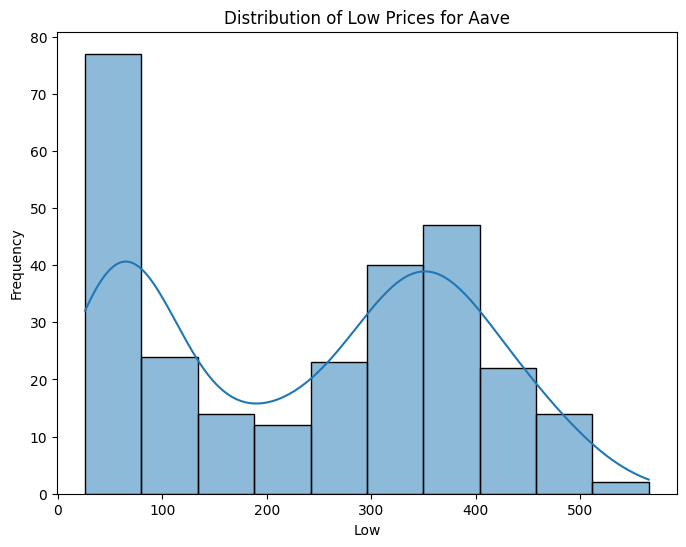

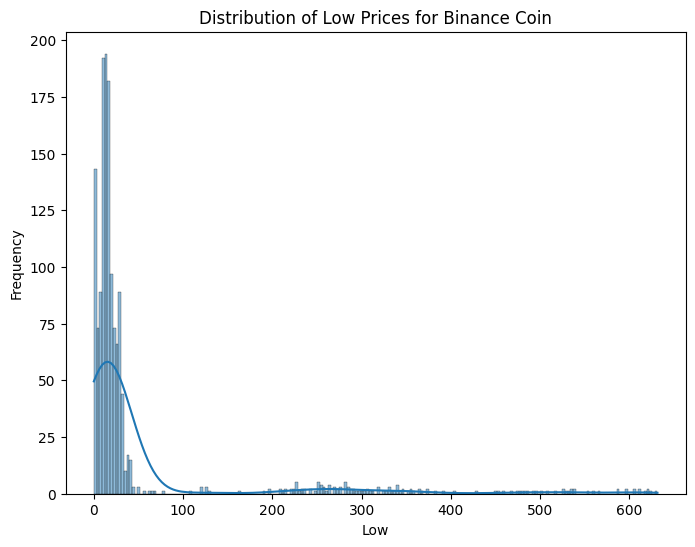

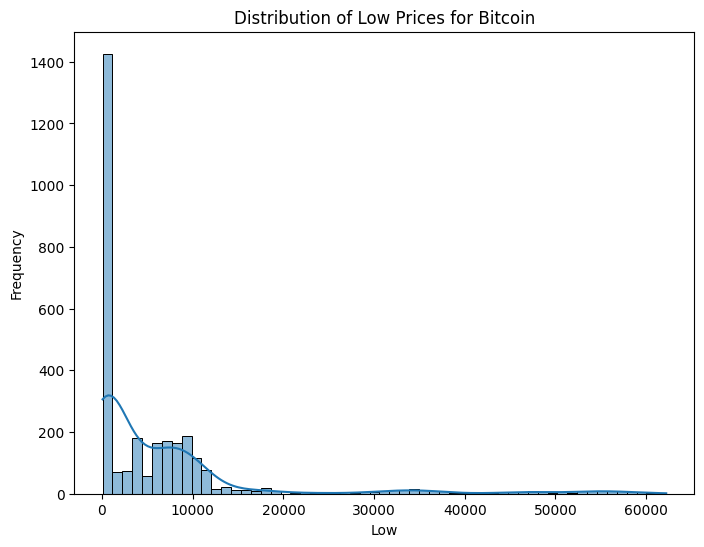

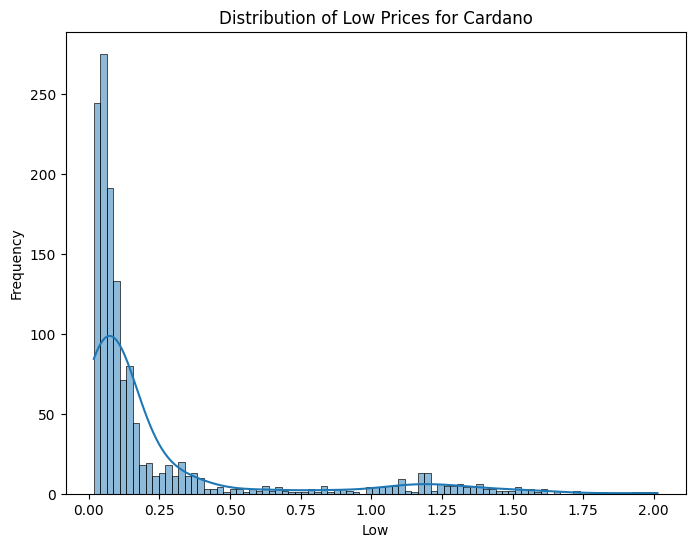

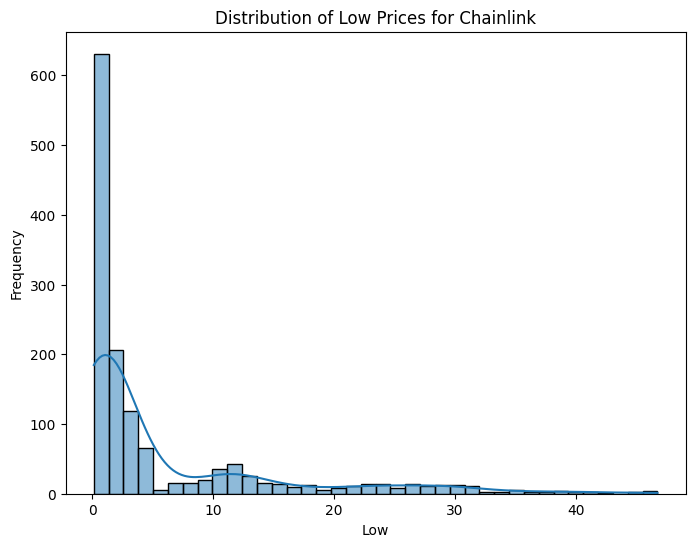

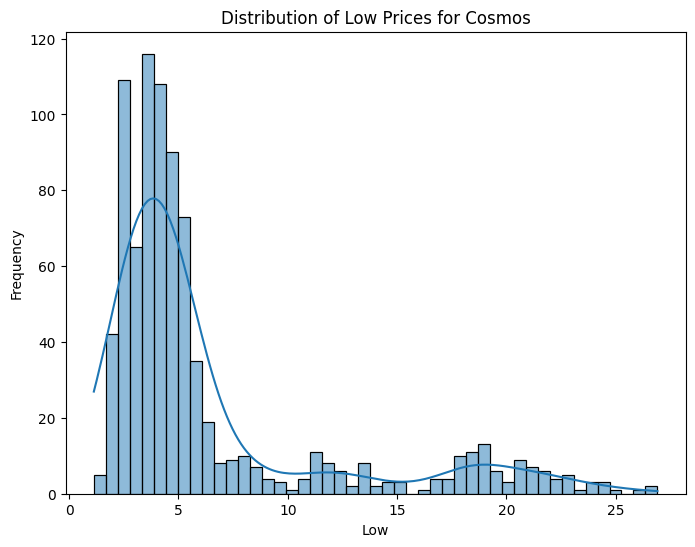

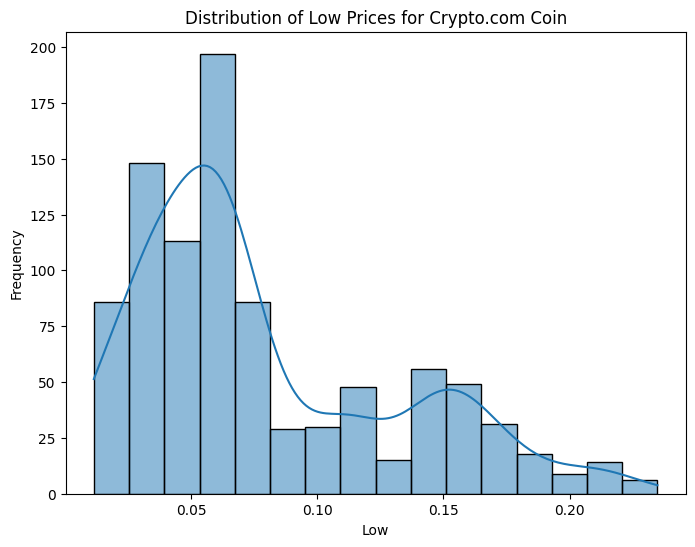

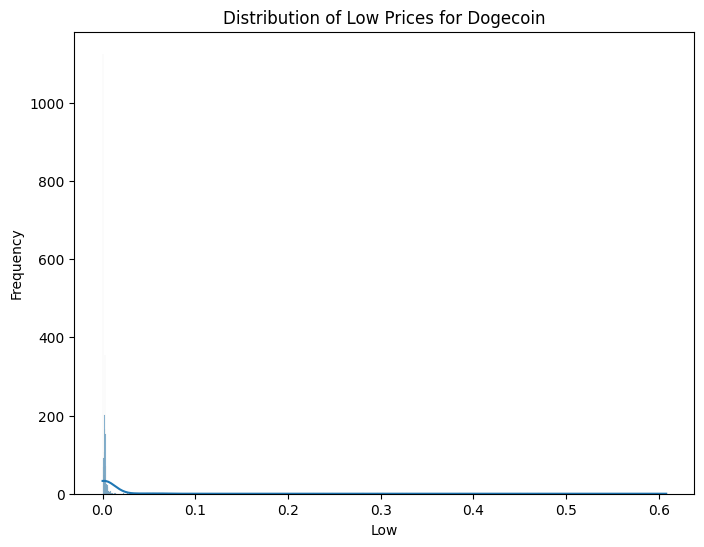

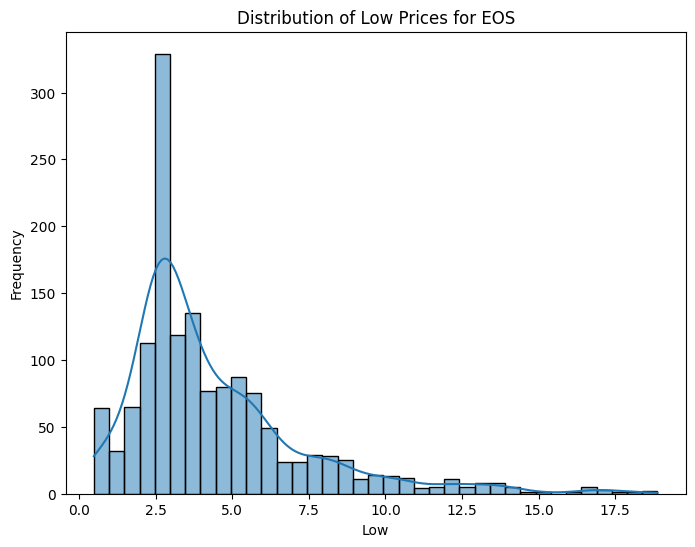

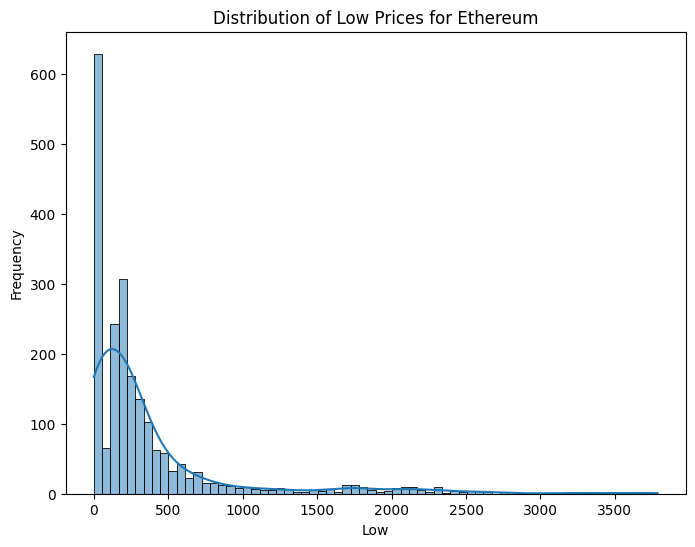

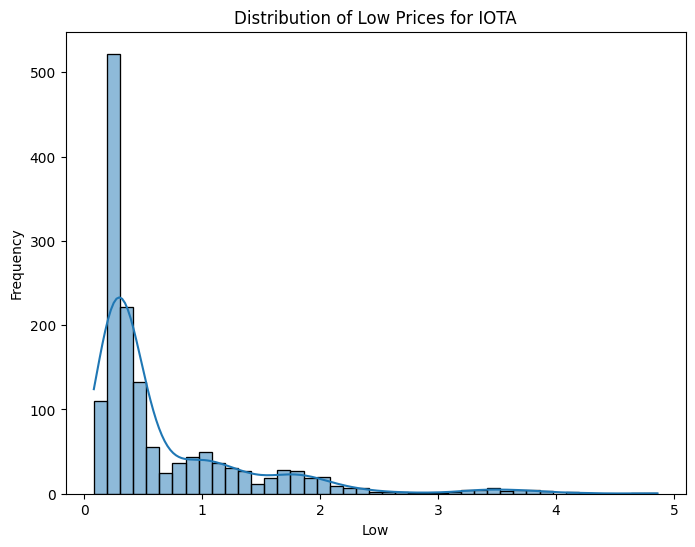

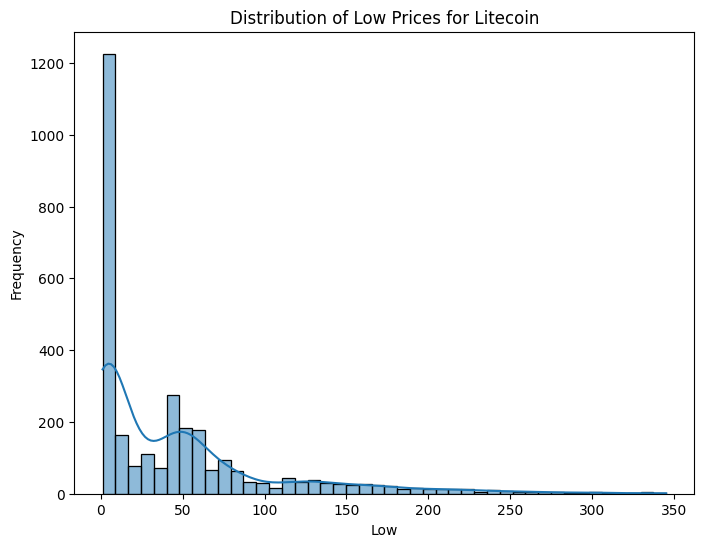

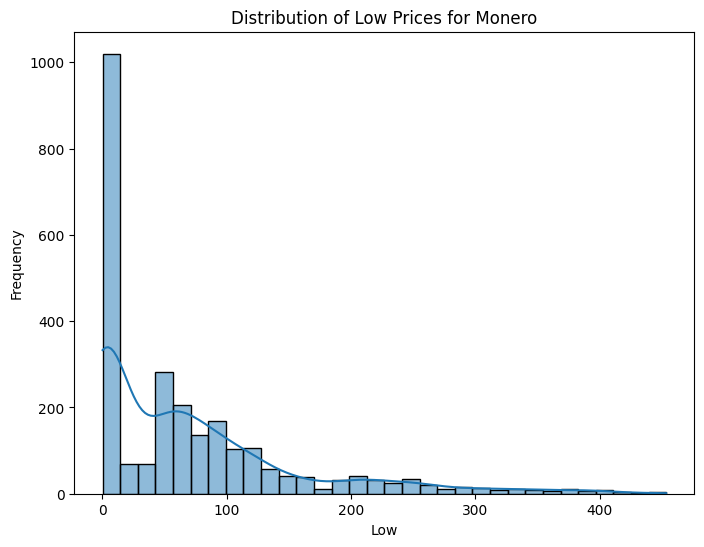

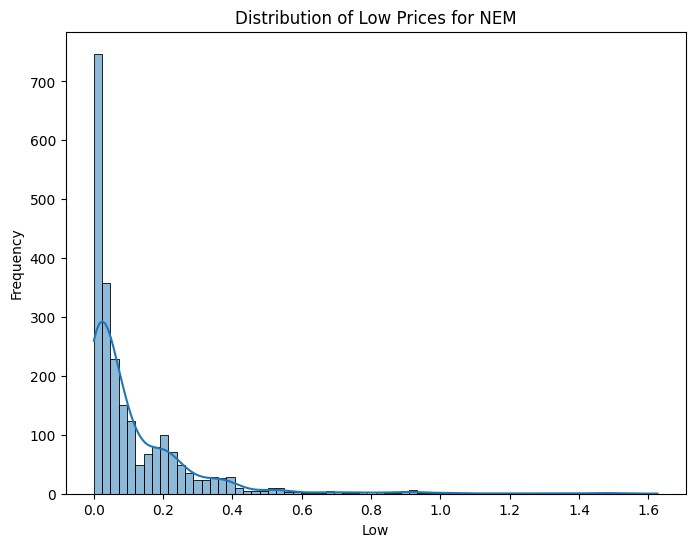

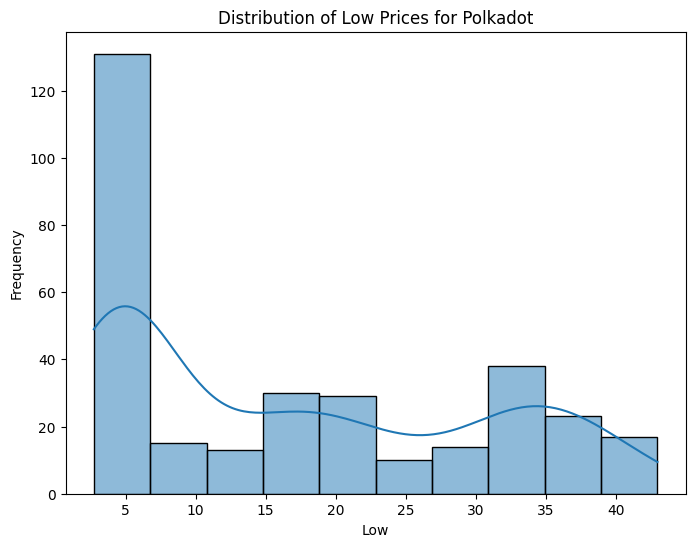

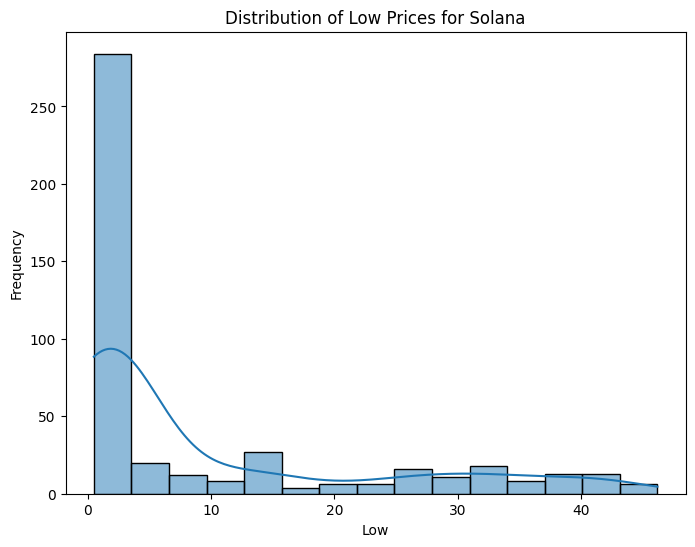

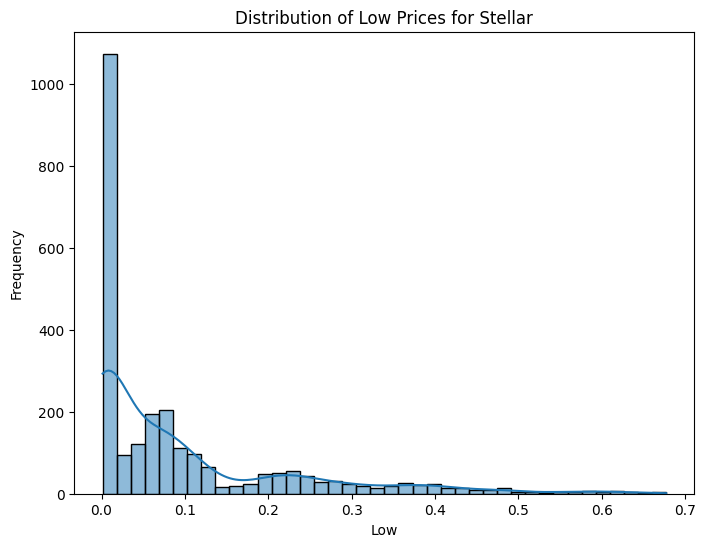

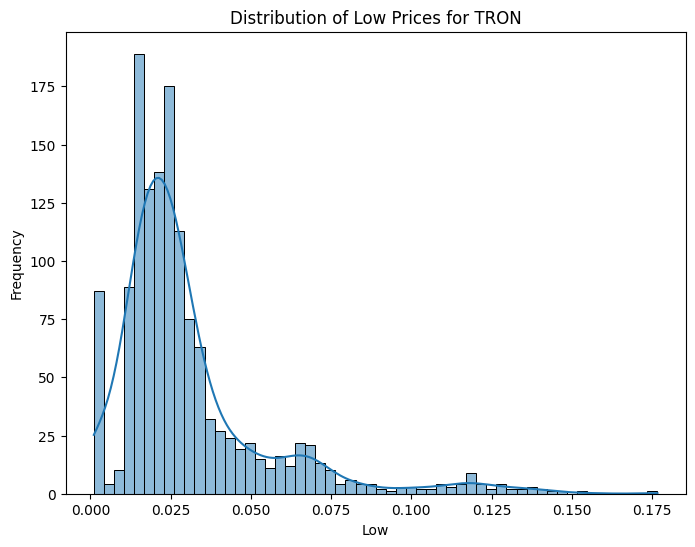

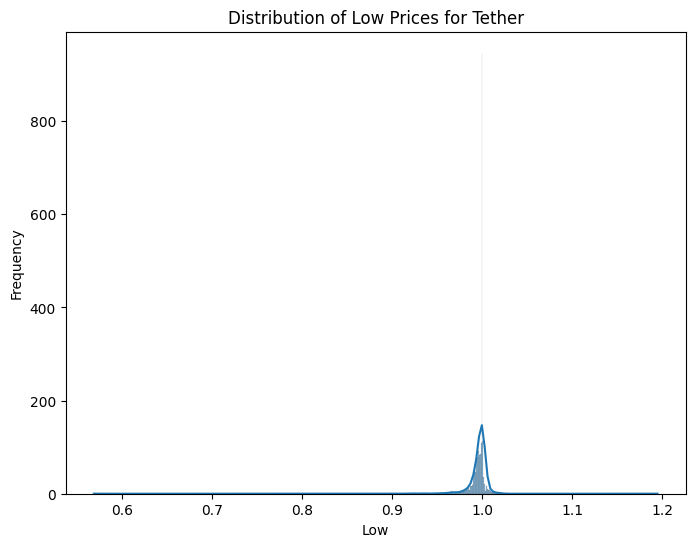

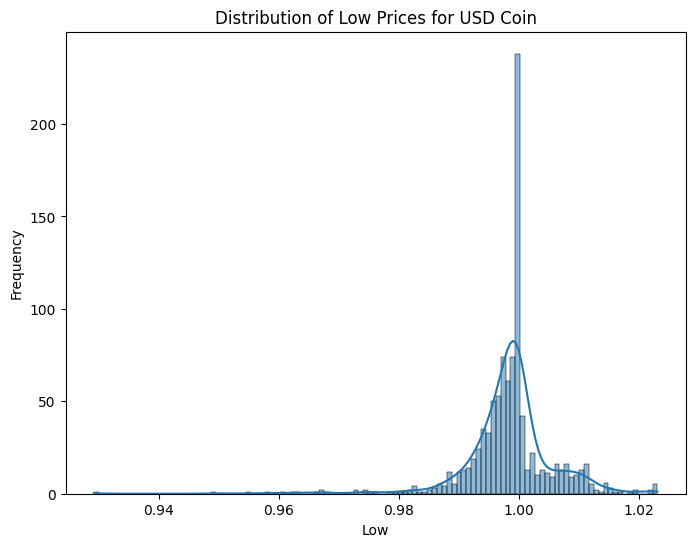

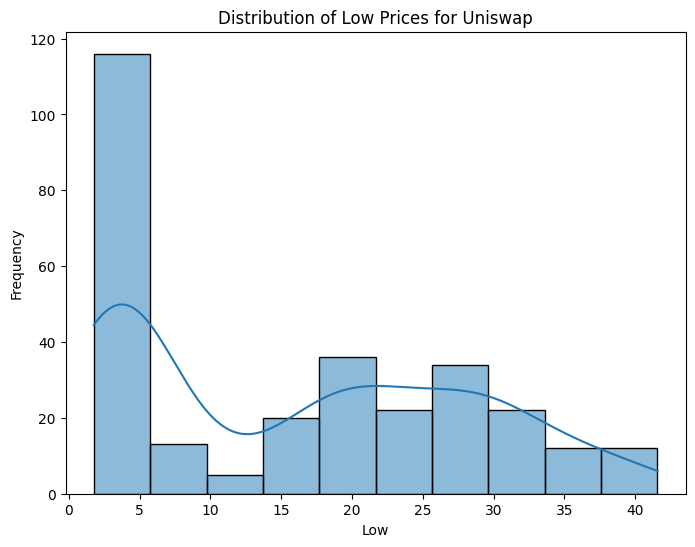

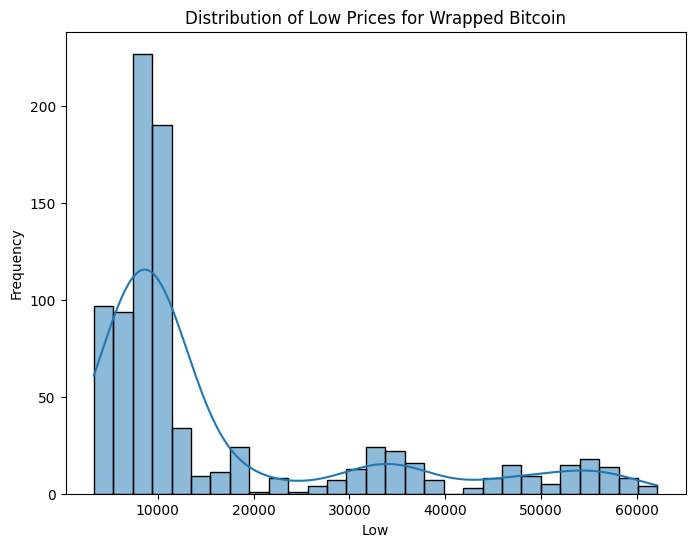

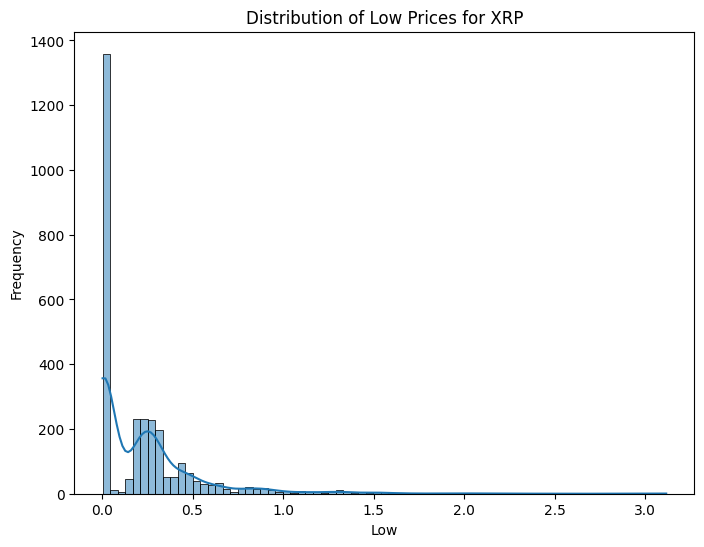

In [145]:
# Group the data by 'Name' and plot histogram for each group
for name, group in final_df.groupby('Name'):
    plt.figure(figsize=(8, 6))
    sns.histplot(group['Low'], kde=True)
    plt.title(f'Distribution of Low Prices for {name}')
    plt.xlabel('Low')
    plt.ylabel('Frequency')
    plt.show()

                             OUTLIERS CHECK

In [147]:
final_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


<Axes: ylabel='Volume'>

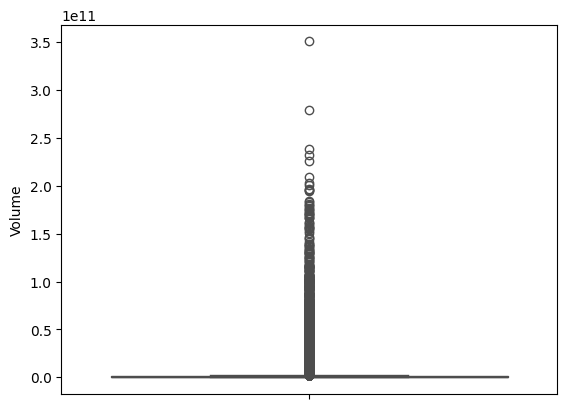

In [149]:
sns.boxplot(final_df["Volume"],color="RED")

                                                Insights:->
                                                1.The Data has very High amount of Outliers.

                             #COUNT OF CURRENCIES ON THE WHOLE DATASET?

<Axes: xlabel='count', ylabel='Name'>

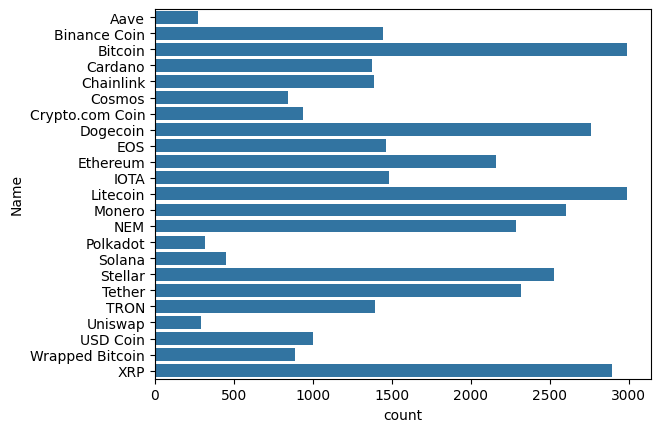

In [151]:
sns.countplot(final_df["Name"])

                                           INSIGHTS:->
                                           1.Bitcoin is the highest amount of Digital Money Curency Down There
                                           It shows that Majority of the 
                                           People Had buy the bitcoin as it was one of the best Currency right now.

                                       #Bivariate Analysis.

In [153]:
final_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


                                              #Name of the coin that has the highest price reach

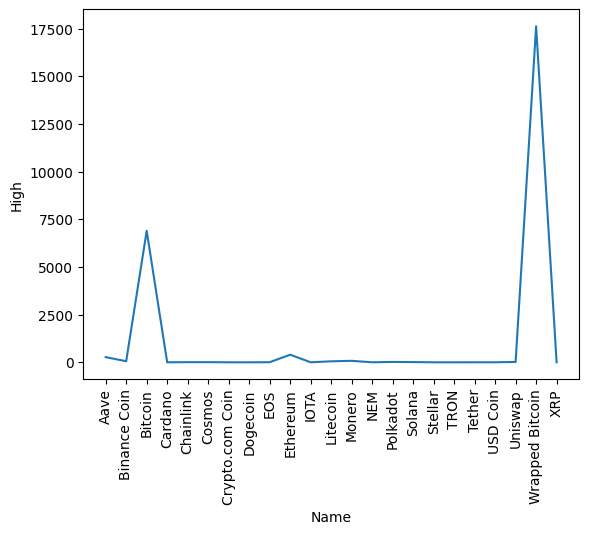

In [155]:
grouped_data = final_df.groupby("Name")["High"].mean().reset_index()

# Create a scatter plot
sns.lineplot(x="Name", y="High", data=grouped_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

                                           #Conclusion
                                           1.Wrapped Bitcoin has the highest price.

                                           #Which coin HAS THE HIGHEST PRICE WHEN WE OPEN THE CURRENT MARKET

In [157]:
grouping=final_df.groupby("Name")["Open"].sum().reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Aave'),
  Text(1, 0, 'Binance Coin'),
  Text(2, 0, 'Bitcoin'),
  Text(3, 0, 'Cardano'),
  Text(4, 0, 'Chainlink'),
  Text(5, 0, 'Cosmos'),
  Text(6, 0, 'Crypto.com Coin'),
  Text(7, 0, 'Dogecoin'),
  Text(8, 0, 'EOS'),
  Text(9, 0, 'Ethereum'),
  Text(10, 0, 'IOTA'),
  Text(11, 0, 'Litecoin'),
  Text(12, 0, 'Monero'),
  Text(13, 0, 'NEM'),
  Text(14, 0, 'Polkadot'),
  Text(15, 0, 'Solana'),
  Text(16, 0, 'Stellar'),
  Text(17, 0, 'TRON'),
  Text(18, 0, 'Tether'),
  Text(19, 0, 'USD Coin'),
  Text(20, 0, 'Uniswap'),
  Text(21, 0, 'Wrapped Bitcoin'),
  Text(22, 0, 'XRP')])

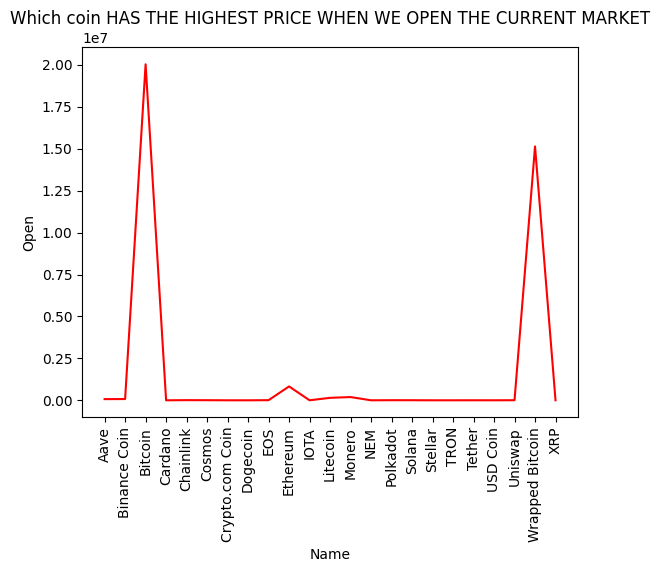

In [159]:
sns.lineplot(x="Name",y="Open",data=grouping,color="red")
plt.xlabel("Name")
plt.ylabel("Open")
plt.title("Which coin HAS THE HIGHEST PRICE WHEN WE OPEN THE CURRENT MARKET")
plt.xticks(rotation=90)

                                              #Conclusion":->
                                             1.The digital curreny that has the highest price when we open the market is Binance Coin

                                 #Which coin HAS THE HIGHEST PRICE WHEN WE Close THE CURRENT MARKET


In [161]:
grouping2=final_df.groupby("Name")["Close"].sum().reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Aave'),
  Text(1, 0, 'Binance Coin'),
  Text(2, 0, 'Bitcoin'),
  Text(3, 0, 'Cardano'),
  Text(4, 0, 'Chainlink'),
  Text(5, 0, 'Cosmos'),
  Text(6, 0, 'Crypto.com Coin'),
  Text(7, 0, 'Dogecoin'),
  Text(8, 0, 'EOS'),
  Text(9, 0, 'Ethereum'),
  Text(10, 0, 'IOTA'),
  Text(11, 0, 'Litecoin'),
  Text(12, 0, 'Monero'),
  Text(13, 0, 'NEM'),
  Text(14, 0, 'Polkadot'),
  Text(15, 0, 'Solana'),
  Text(16, 0, 'Stellar'),
  Text(17, 0, 'TRON'),
  Text(18, 0, 'Tether'),
  Text(19, 0, 'USD Coin'),
  Text(20, 0, 'Uniswap'),
  Text(21, 0, 'Wrapped Bitcoin'),
  Text(22, 0, 'XRP')])

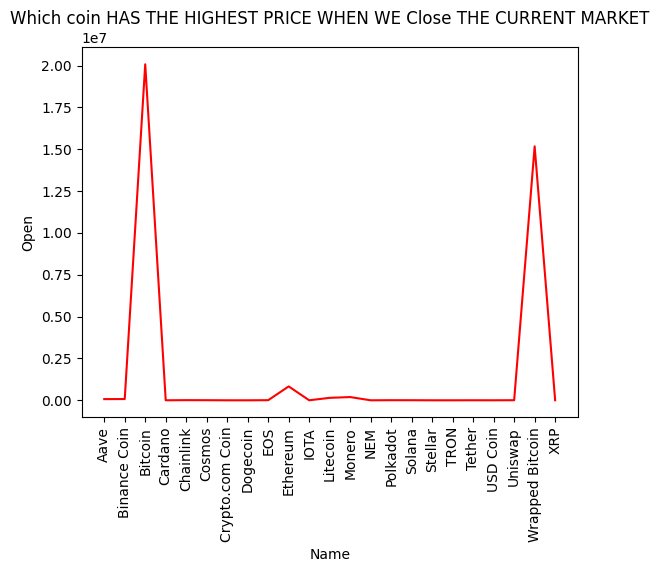

In [163]:
sns.lineplot(x="Name",y="Close",data=grouping2,color="red")
plt.xlabel("Name")
plt.ylabel("Open")
plt.title("Which coin HAS THE HIGHEST PRICE WHEN WE Close THE CURRENT MARKET")
plt.xticks(rotation=90)

                                              #Conclusion
                                              1.Bitcoin has the highest price when we close the market

                                  #Checking the Correlation between MarketCap and Volume

In [165]:
correlation = final_df['Marketcap'].corr(final_df['Volume'])
print(f'Correlation between Marketcap and Volume: {correlation:.2f}')

Correlation between Marketcap and Volume: 0.49


                                            #Conclusion
                                            1.Weak or no linear correlation

                                                #Price Variation (High-Low) vs. Volume

In [167]:
final_df["price_variation"]=final_df["High"]-final_df["Low"]

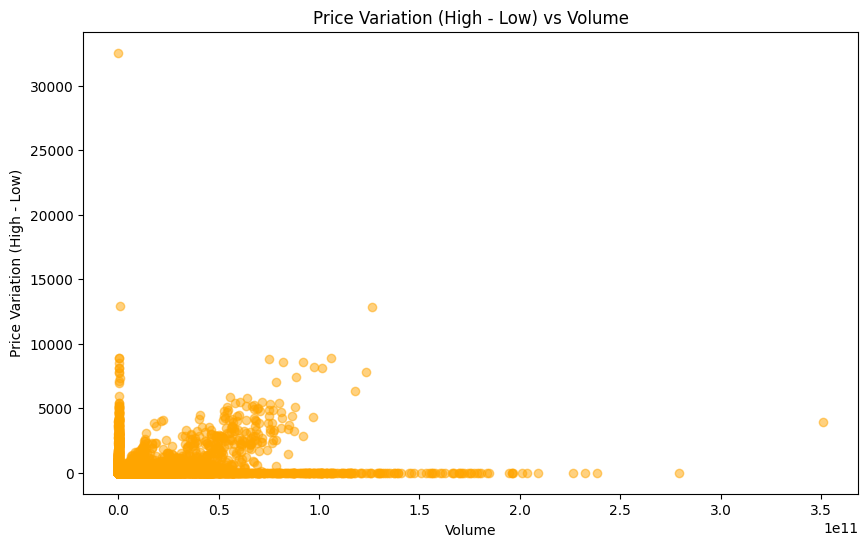

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Volume'],final_df['price_variation'], alpha=0.5, color='orange')
plt.title('Price Variation (High - Low) vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price Variation (High - Low)')
plt.show()

                                           #Conclusion
                                         1. Volume is lesser Price will be Higher

In [209]:
final_df.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,price_variation,Year,Month,Original_date,Hour,Minute,Second
0,1,Aave,AAVE,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07,5.324459,2020,10,5,23,59,59
1,2,Aave,AAVE,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07,12.667692,2020,10,6,23,59,59
2,3,Aave,AAVE,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07,6.437624,2020,10,7,23,59,59
3,4,Aave,AAVE,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08,8.206454,2020,10,8,23,59,59
4,5,Aave,AAVE,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08,4.277757,2020,10,9,23,59,59


In [191]:
#splitting the DATE column
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Original_date'] = final_df['Date'].dt.day



In [205]:
#splitting the DATE column into hour min and sec
final_df['Hour'] = final_df['Date'].dt.hour
final_df['Minute'] = final_df['Date'].dt.minute
final_df['Second'] = final_df['Date'].dt.second

In [241]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              37082 non-null  int64 
 1   Name             37082 non-null  int32 
 2   Symbol           37082 non-null  object
 3   High             37082 non-null  int32 
 4   Low              37082 non-null  int32 
 5   Open             37082 non-null  int32 
 6   Close            37082 non-null  int32 
 7   Volume           37082 non-null  int32 
 8   Marketcap        37082 non-null  int32 
 9   price_variation  37082 non-null  int32 
 10  Year             37082 non-null  int32 
 11  Month            37082 non-null  int32 
 12  Original_date    37082 non-null  int32 
 13  Hour             37082 non-null  int32 
 14  Minute           37082 non-null  int32 
 15  Second           37082 non-null  int32 
dtypes: int32(14), int64(1), object(1)
memory usage: 2.5+ MB


In [248]:
final_df["High"]=final_df["High"].astype(int)
final_df["Low"]=final_df["Low"].astype(int)
final_df["Open"]=final_df["Open"].astype(int)
final_df["Close"]=final_df["Close"].astype(int)
final_df["Volume"]=final_df["Volume"].astype(int)
final_df["Marketcap"]=final_df["Marketcap"].astype(int)
final_df['Name'] = pd.to_numeric(final_df['Name'], errors='coerce').fillna(0).astype(int)
final_df['Symbol'] = pd.to_numeric(final_df['Symbol'], errors='coerce').fillna(0).astype(int)

In [278]:
X = final_df[['Year', 'Month', 'Original_date', 'Hour', 'Minute', 'Volume', 'Marketcap']]
y = final_df['Close'] 

In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                                   #Implementing The Ml algo

In [280]:
from sklearn.ensemble import RandomForestRegressor

In [281]:
RR=RandomForestRegressor(n_estimators=100, random_state=42)

In [282]:
RR.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [283]:
prediction=RR.predict(X_test)

In [284]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [285]:
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 1334.04
Mean Squared Error (MSE): 26260857.18
Root Mean Squared Error (RMSE): 5124.53


In [289]:
final_df.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,price_variation,Year,Month,Original_date,Hour,Minute,Second
0,1,0,0,55,49,52,53,0,89128128,5,2020,10,5,23,59,59
1,2,0,0,53,40,53,42,583091,71011441,12,2020,10,6,23,59,59
2,3,0,0,42,35,42,40,682834,67130036,6,2020,10,7,23,59,59
3,4,0,0,44,36,39,43,1658816,220265142,8,2020,10,8,23,59,59
4,5,0,0,47,43,43,46,815537,235632208,4,2020,10,9,23,59,59


                                              #FINAL CONCLUSION:->
                                             1.THIS THE END DATA WELL ENCODED SO THAT IT CAN EASILY UNDERSTANDABLE BY THE MACHINERY.